# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

[GitHub Project](https://github.com/dayan3847/machine_learning/#practice-basis-functions)


# Basis Functions 3D

[GitHub](https://github.com/dayan3847/machine_learning/blob/master/dayan3847/basis_functions/basis_functions_3d.ipynb)

[Colab](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/dayan3847/basis_functions/basis_functions_3d.ipynb)


### Imports

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import plotly as py

### Random Seed

In [3]:
np.random.seed(0)

## Polynomial

In [4]:
# Count of factors (per dimension)
count_d: int = 2
'count per dimension: {}'.format(count_d)

'count per dimension: 2'

In [5]:
def factor_polynomial() -> sp.Symbol:
    # Variable
    x, y = sp.symbols('x y')
    # Hyper-Parameters
    n, m = sp.symbols('n m')  # Order of factor (degree)
    return (x ** n) * (y ** m)


factor_polynomial()

x**n*y**m

In [6]:
# Degree list

d_list: np.ndarray = np.arange(count_d)
n_list, m_list = np.meshgrid(d_list, d_list)
n_list = n_list.flatten()
m_list = m_list.flatten()
n_list, m_list

(array([0, 1, 0, 1]), array([0, 0, 1, 1]))

In [7]:
count:int = len(n_list)
count

4

In [8]:
def equation_polynomial() -> sp.Symbol:
    result: sp.Symbol = 0
    # Variable
    x, y = sp.symbols('x y')
    for i, n, m in zip(np.arange(count), n_list, m_list):
        wi: sp.Symbol = sp.symbols('w{}'.format(i))
        result += wi * ( (x ** n) * (y ** m) )

    return result


equation_polynomial()

w0 + w1*x + w2*y + w3*x*y

In [9]:
# Plot 3D
def plot_polynomial(w_list_):
    fig = plt.figure(figsize=(10, 5))
    ax = [
        fig.add_subplot(121, projection='3d'),
        fig.add_subplot(122, projection='3d'),
    ]

    for i in range(2):
        ax[i].set_xlim(-1, 1)
        ax[i].set_ylim(-1, 1)
        ax[i].set_zlim(-1, 1)
        ax[i].set_xlabel('x')
        ax[i].set_ylabel('y')
        ax[i].set_zlabel('z')


    ax[0].set_title('Polynomial Factors')
    ax[1].set_title('Polynomial Equation')

    x_plot, y_plot = np.meshgrid(
        np.linspace(-1, 1, 1000),
        np.linspace(-1, 1, 1000)
    )

    z_plot_e = np.zeros(shape=(1000, 1000))
    for w, n, m in zip(w_list_, n_list, m_list):
        z_plot_f = w * (x_plot ** n) * (y_plot ** m)
        ax[0].plot_surface(x_plot, y_plot, z_plot_f)
        z_plot_e += z_plot_f

    ax[1].plot_surface(x_plot, y_plot, z_plot_e, cmap='viridis')

    plt.tight_layout()
    plt.show()


### Weight = 1

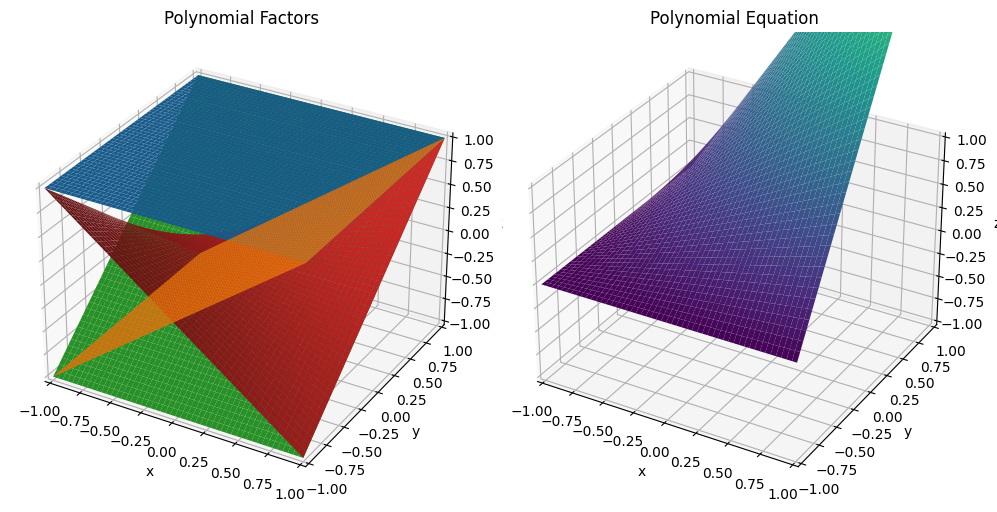

In [10]:
w_list = np.full(count, 1)
plot_polynomial(w_list)

### Weight Random

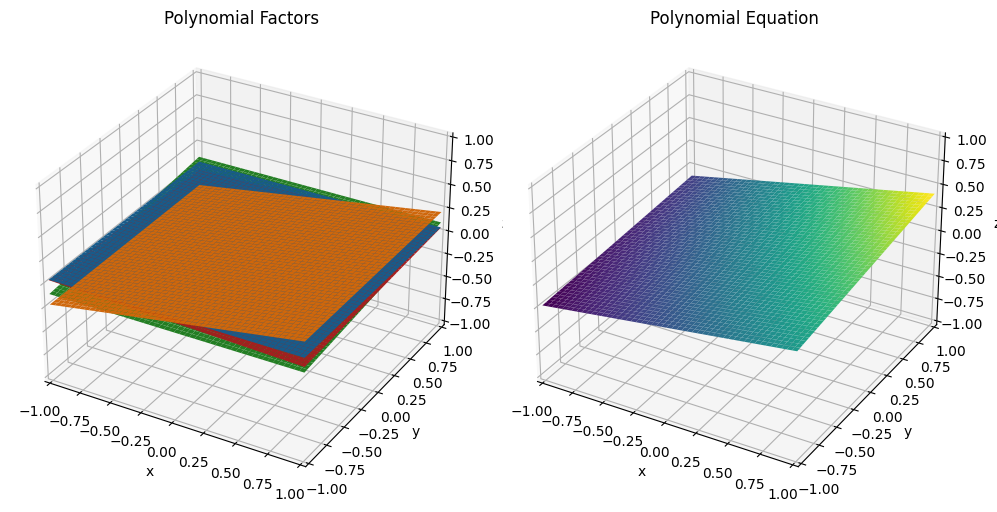

In [11]:
w_list = np.random.rand(count) - .5
plot_polynomial(w_list)

## Gaussian

In [12]:
# Count of factors (per dimension)
count_d: int = 5
'count per dimension: {}'.format(count_d)

'count per dimension: 5'

In [13]:
def factor_gaussian() -> sp.exp:
    # Variable
    x, y = sp.symbols('x y')
    # Hyper-Parameters
    m1, m2 = sp.symbols('m1 m2')  # Mean
    s: sp.Symbol = sp.Symbol('s')  # Standard deviation
    return sp.exp(-1 * ((x - m1) ** 2) / (2 * (s ** 2))) * sp.exp(-1 * ((x - m2) ** 2) / (2 * (s ** 2)))


factor_gaussian()

exp(-(-m1 + x)**2/(2*s**2))*exp(-(-m2 + x)**2/(2*s**2))

In [14]:
# Mean list
m_list: np.array = np.linspace(-1, 1, count_d)
m1_list, m2_list = np.meshgrid(m_list, m_list)
m1_list = m1_list.flatten()
m2_list = m2_list.flatten()
m1_list, m2_list

(array([-1. , -0.5,  0. ,  0.5,  1. , -1. , -0.5,  0. ,  0.5,  1. , -1. ,
        -0.5,  0. ,  0.5,  1. , -1. , -0.5,  0. ,  0.5,  1. , -1. , -0.5,
         0. ,  0.5,  1. ]),
 array([-1. , -1. , -1. , -1. , -1. , -0.5, -0.5, -0.5, -0.5, -0.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  0.5,  0.5,  0.5,  0.5,  0.5,  1. ,  1. ,
         1. ,  1. ,  1. ]))

In [15]:
count:int = len(m1_list)
count

25

In [16]:
# Standard deviation list
s_list: np.array = np.full(count, 0.1)
s_list

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [17]:
def equation_gaussian() -> sp.Symbol:
    result: sp.Symbol = 0
    # Variable
    x, y = sp.symbols('x y')
    for i, m1, m2, s in zip(np.arange(count), m1_list, m2_list, s_list):
        wi: sp.Symbol = sp.symbols('w{}'.format(i))
        result += wi * ( sp.exp(-1 * ((x - m1) ** 2) / (2 * (s ** 2))) ) * ( sp.exp(-1 * ((y - m2) ** 2) / (2 * (s ** 2))) )

    return result


equation_gaussian()

w0*exp(-50.0*(x + 1.0)**2)*exp(-50.0*(y + 1.0)**2) + w1*exp(-50.0*(x + 0.5)**2)*exp(-50.0*(y + 1.0)**2) + w10*exp(-50.0*y**2)*exp(-50.0*(x + 1.0)**2) + w11*exp(-50.0*y**2)*exp(-50.0*(x + 0.5)**2) + w12*exp(-50.0*x**2)*exp(-50.0*y**2) + w13*exp(-50.0*y**2)*exp(-50.0*(x - 0.5)**2) + w14*exp(-50.0*y**2)*exp(-50.0*(x - 1.0)**2) + w15*exp(-50.0*(x + 1.0)**2)*exp(-50.0*(y - 0.5)**2) + w16*exp(-50.0*(x + 0.5)**2)*exp(-50.0*(y - 0.5)**2) + w17*exp(-50.0*x**2)*exp(-50.0*(y - 0.5)**2) + w18*exp(-50.0*(x - 0.5)**2)*exp(-50.0*(y - 0.5)**2) + w19*exp(-50.0*(x - 1.0)**2)*exp(-50.0*(y - 0.5)**2) + w2*exp(-50.0*x**2)*exp(-50.0*(y + 1.0)**2) + w20*exp(-50.0*(x + 1.0)**2)*exp(-50.0*(y - 1.0)**2) + w21*exp(-50.0*(x + 0.5)**2)*exp(-50.0*(y - 1.0)**2) + w22*exp(-50.0*x**2)*exp(-50.0*(y - 1.0)**2) + w23*exp(-50.0*(x - 0.5)**2)*exp(-50.0*(y - 1.0)**2) + w24*exp(-50.0*(x - 1.0)**2)*exp(-50.0*(y - 1.0)**2) + w3*exp(-50.0*(x - 0.5)**2)*exp(-50.0*(y + 1.0)**2) + w4*exp(-50.0*(x - 1.0)**2)*exp(-50.0*(y + 1.0)**2)

In [18]:
# Plot
def plot_gaussian(w_list_):
    fig = plt.figure(figsize=(10, 5))
    ax = [
        fig.add_subplot(121, projection='3d'),
        fig.add_subplot(122, projection='3d'),
    ]

    for i in range(2):
        ax[i].set_xlim(-1, 1)
        ax[i].set_ylim(-1, 1)
        ax[i].set_zlim(-1, 1)
        ax[i].set_xlabel('x')
        ax[i].set_ylabel('y')
        ax[i].set_zlabel('z')

    ax[0].set_title('Gaussian Factors')
    ax[1].set_title('Gaussian Equation')

    x_plot, y_plot = np.meshgrid(
        np.linspace(-1, 1, 100),
        np.linspace(-1, 1, 100),
    )

    z_plot_e = np.zeros(shape=(100, 100))
    for w, m1, m2, s in zip(w_list_, m1_list, m2_list, s_list):
        z_plot_f = w * ( np.exp(-1 * ((x_plot - m1) ** 2) / (2 * (s ** 2))) ) * ( np.exp(-1 * ((y_plot - m2) ** 2) / (2 * (s ** 2))) )
        ax[0].plot_surface(x_plot, y_plot, z_plot_f, alpha=0.2)
        z_plot_e += z_plot_f

    ax[1].plot_surface(x_plot, y_plot, z_plot_e, cmap='viridis')

    plt.tight_layout()
    plt.show()

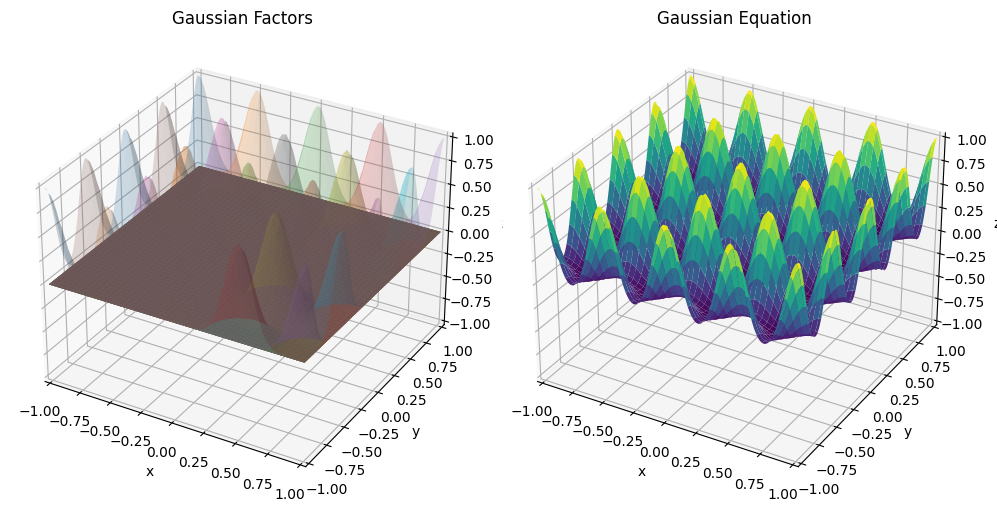

In [19]:
w_list = np.full(count, 1)
plot_gaussian(w_list)

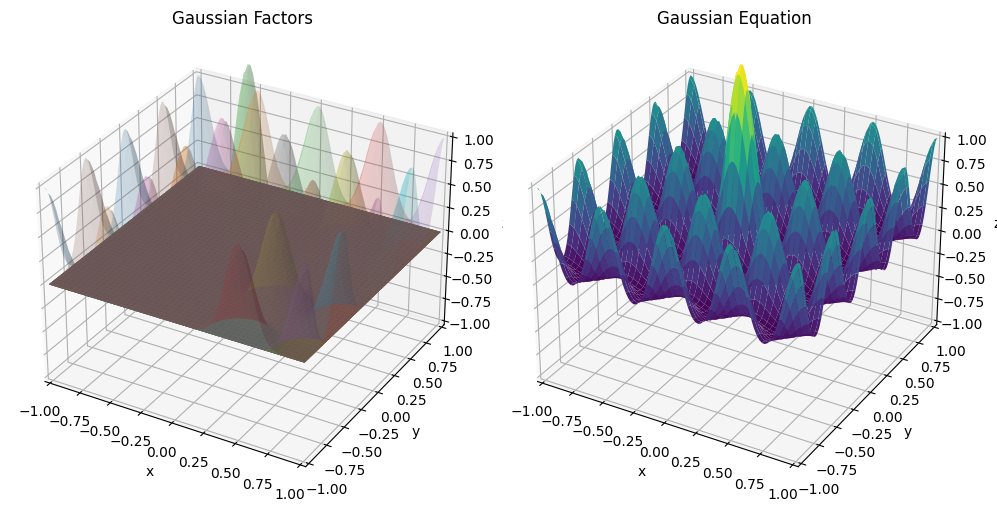

In [20]:
w_list[int(count / 2)] = 2
plot_gaussian(w_list)

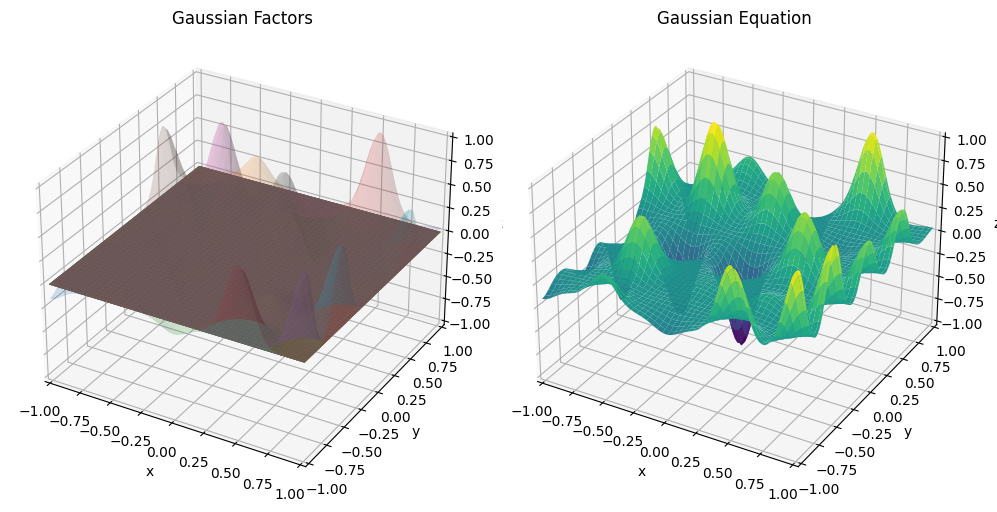

In [21]:
w_list = np.random.rand(count) * 2 - 1
plot_gaussian(w_list)

## Sigmoidal

In [22]:
# Count of factors (per dimension)
count_d: int = 2
'count per dimension: {}'.format(count_d)

'count per dimension: 2'

In [23]:
def factor_sigmoidal() -> sp.Expr:
    # Variable
    x: sp.Symbol = sp.Symbol('x')
    # Hyper-Parameters
    m: sp.Symbol = sp.Symbol('m')  # Mean
    s: sp.Symbol = sp.Symbol('s')  # Standard deviation
    return 1 / (1 + sp.exp((m - x) / s))


factor_sigmoidal()

1/(exp((m - x)/s) + 1)

In [24]:
# Mean list
m_list: np.array = np.linspace(-1, 1, count_d)
m1_list, m2_list = np.meshgrid(m_list, m_list)
m1_list = m1_list.flatten()
m2_list = m2_list.flatten()
m1_list, m2_list

(array([-1.,  1., -1.,  1.]), array([-1., -1.,  1.,  1.]))

In [25]:
count:int = len(m1_list)
count

4

In [26]:
# Standard deviation list
s_list: np.array = np.full(count, 0.1)
s_list

array([0.1, 0.1, 0.1, 0.1])

In [27]:
def equation_sigmoidal() -> sp.Symbol:
    result: sp.Symbol = 0
    # Variable
    x, y = sp.symbols('x y')
    for i, m1, m2, s in zip(np.arange(count), m1_list, m2_list, s_list):
        wi: sp.Symbol = sp.symbols('w{}'.format(i))
        result += wi * ( 1 / (1 + sp.exp((m1 - x) / s)) ) * ( 1 / (1 + sp.exp((m2 - y) / s)) )

    return result

equation_sigmoidal()

w0/((1 + 4.53999297624849e-5*exp(-10.0*x))*(1 + 4.53999297624849e-5*exp(-10.0*y))) + w1/((1 + 22026.4657948067*exp(-10.0*x))*(1 + 4.53999297624849e-5*exp(-10.0*y))) + w2/((1 + 4.53999297624849e-5*exp(-10.0*x))*(1 + 22026.4657948067*exp(-10.0*y))) + w3/((1 + 22026.4657948067*exp(-10.0*x))*(1 + 22026.4657948067*exp(-10.0*y)))

In [28]:
def plot_sigmoidal(w_list_):
    fig = plt.figure(figsize=(10, 5))
    ax = [
        fig.add_subplot(121, projection='3d'),
        fig.add_subplot(122, projection='3d'),
    ]

    for i in range(2):
        ax[i].set_xlim(-1, 1)
        ax[i].set_ylim(-1, 1)
        ax[i].set_zlim(-1, 1)
        ax[i].set_xlabel('x')
        ax[i].set_ylabel('y')
        ax[i].set_zlabel('z')

    ax[0].set_title('Sigmoidal Factors')
    ax[1].set_title('Sigmoidal Equation')

    x_plot, y_plot = np.meshgrid(
        np.linspace(-1, 1, 100),
        np.linspace(-1, 1, 100),
    )

    z_plot_e = np.zeros(shape=(100, 100))
    for w, m1, m2, s in zip(w_list_, m1_list, m2_list, s_list):
        z_plot_f = w * ( 1 / (1 + np.exp((m1 - x_plot) / s)) ) * ( 1 / (1 + np.exp((m2 - y_plot) / s)) )
        ax[0].plot_surface(x_plot, y_plot, z_plot_f, alpha=0.2)
        z_plot_e += z_plot_f

    ax[1].plot_surface(x_plot, y_plot, z_plot_e, cmap='viridis')

    plt.tight_layout()
    plt.show()


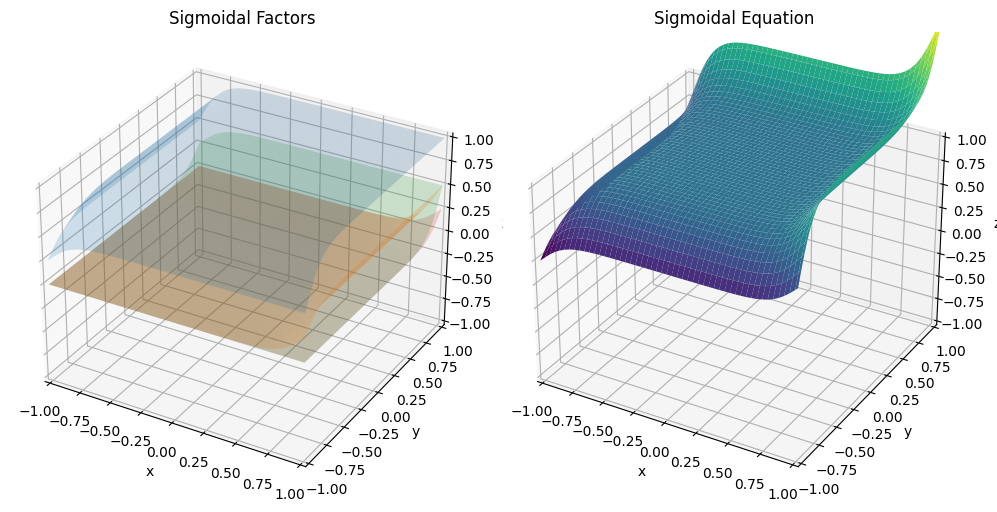

In [29]:
w_list = np.full(count, 1)
plot_sigmoidal(w_list)

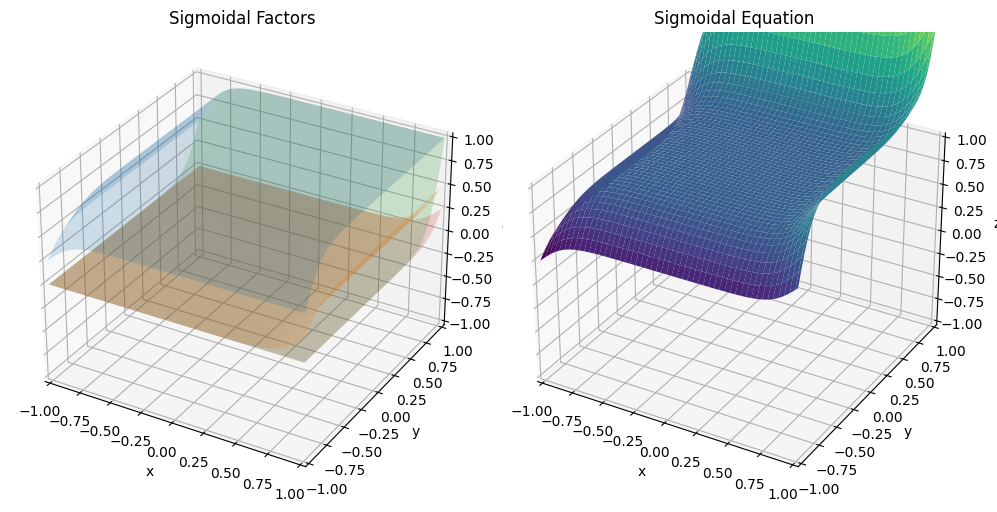

In [30]:
w_list[int(count / 2)] = 2
plot_sigmoidal(w_list)

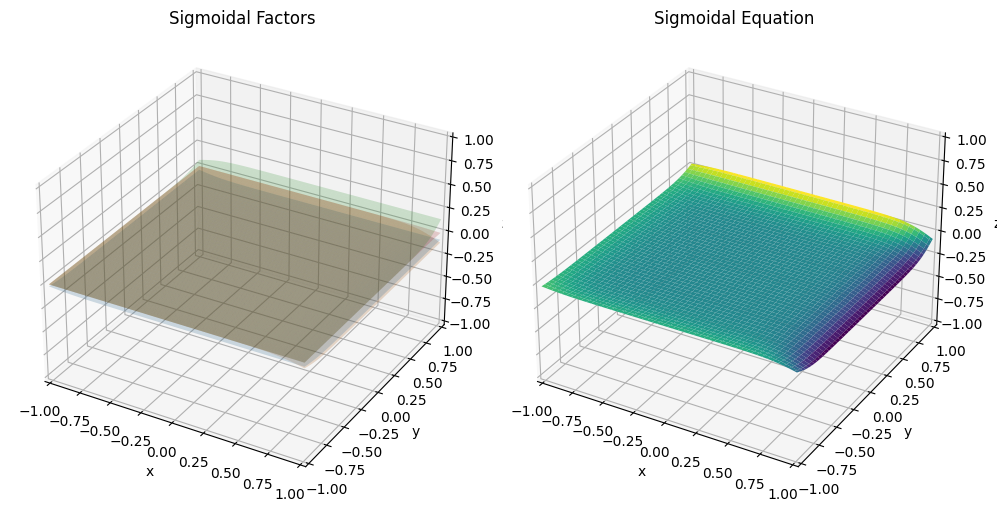

In [31]:
w_list = np.random.rand(count) - .5
plot_sigmoidal(w_list)